Practical No. 06\
Sumeet shinde T116\
Aim - Regression and Its Types\
 Implement simple linear regression using a dataset.\
 Explore and interpret the regression model coefficients and goodness-of-fit
measures.\
 Extend the analysis to multiple linear regression and assess the impact of
additional predictors.

Dataset used - Diamonds\
Simple Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_csv("/content/diamonds.csv")
print(df.head())


   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB
None


In [ ]:

# --- Basic description ---
print(df[['carat', 'price']].describe())

              carat         price
count  53940.000000  53940.000000
mean       0.797940   3932.799722
std        0.474011   3989.439738
min        0.200000    326.000000
25%        0.400000    950.000000
50%        0.700000   2401.000000
75%        1.040000   5324.250000
max        5.010000  18823.000000


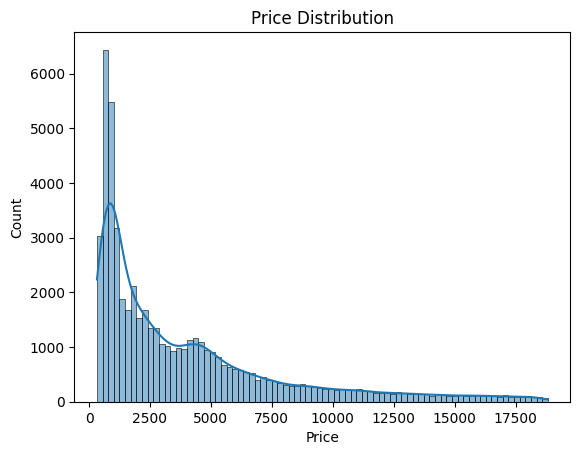

In [ ]:
# --- Distribution of price ---
plt.title("Price Distribution")
sns.histplot(df["price"], kde=True)
plt.xlabel("Price")
plt.show()

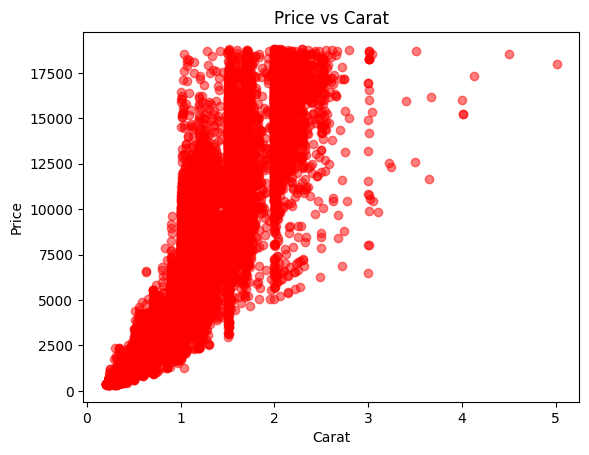

In [ ]:
# --- Relationship between carat and price ---
plt.scatter(df["carat"], df["price"], alpha=0.5, color="red")
plt.title("Price vs Carat")
plt.xlabel("Carat")
plt.ylabel("Price")
plt.show()

In [ ]:
# --- Independent & dependent variables ---
X = df[["carat"]]      # 2D array
y = df[["price"]]

# --- Train / test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# --- Train the model ---
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# --- Predictions ---
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)


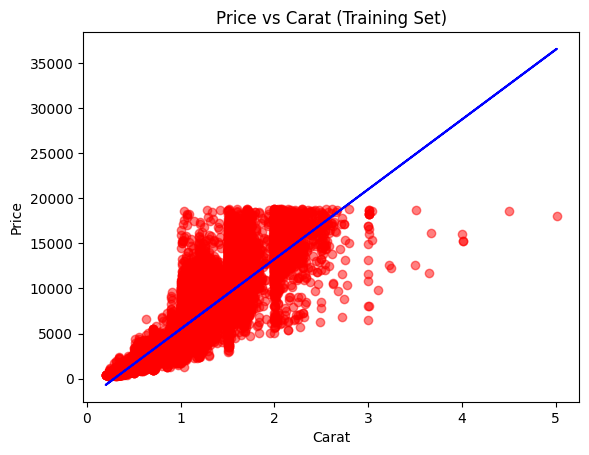

In [ ]:
# --- Plot: Training set ---
plt.scatter(X_train, y_train, color="red", alpha=0.5)
plt.plot(X_train, y_pred_train, color="blue")
plt.title("Price vs Carat (Training Set)")
plt.xlabel("Carat")
plt.ylabel("Price")
plt.show()

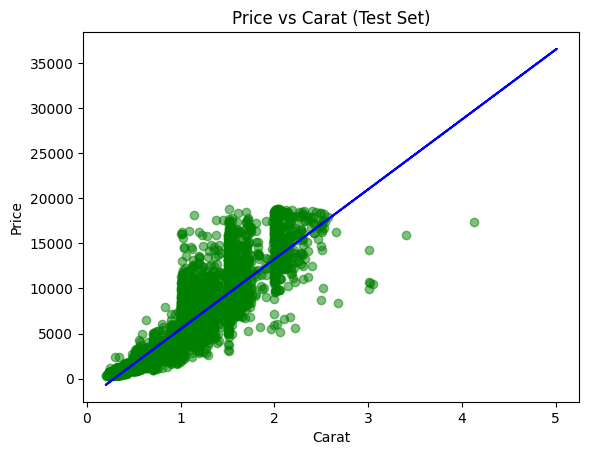

In [ ]:
# --- Plot: Test set ---
plt.scatter(X_test, y_test, color="green", alpha=0.5)
plt.plot(X_train, y_pred_train, color="blue")
plt.title("Price vs Carat (Test Set)")
plt.xlabel("Carat")
plt.ylabel("Price")
plt.show()

In [ ]:
# --- Coefficients & R² ---
print("Slope (beta1):", regressor.coef_)
print("Intercept (beta0):", regressor.intercept_)
print("R² score (test):", regressor.score(X_test, y_test))


Slope (beta1): [[7745.26]]
Intercept (beta0): [-2248.46]
R² score (test): 0.8515758113126248


MULTIPLE LINEAR REGRESSION

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

# Import data
df_dia = pd.read_csv('/content/diamonds.csv')

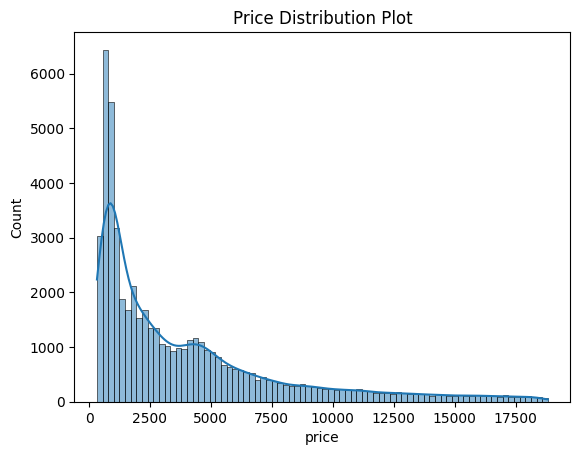

In [ ]:
# Distribution
# Data distribution of Price
plt.title('Price Distribution Plot')
sns.histplot(df_dia['price'], kde=True) # Changed distplot to histplot as per warning
plt.show()

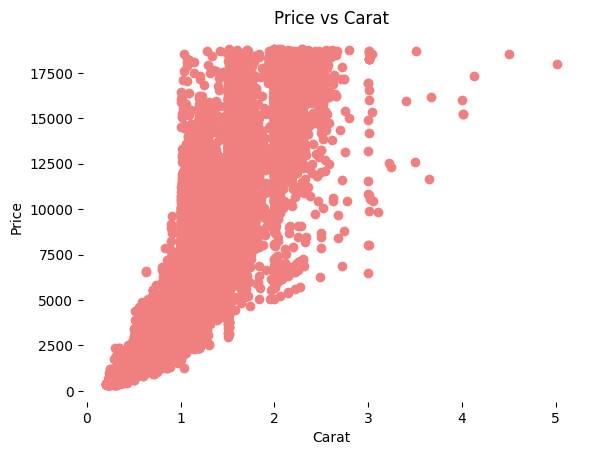

In [ ]:
# Relationship between Price and Carat
plt.scatter(df_dia['carat'], df_dia['price'], color = 'lightcoral')
plt.title('Price vs Carat')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.box(False)
plt.show()

In [ ]:
# Split into Independent/Dependent variables
# Keep X as a DataFrame for ColumnTransformer to work correctly with column names/indices
X = df_dia.drop('price', axis=1)
y = df_dia['price'].values

ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(handle_unknown='ignore'), [2, 3, 4])], # Corrected indices for cut, color, clarity
    remainder='passthrough'
)
X = ct.fit_transform(X)

# Split into Train/Test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 0)

In [ ]:

# Train model
# Train multiple regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict results
y_pred = regressor.predict(X_test)

# Compare predictions
np.set_printoptions(precision = 2)
result = np.concatenate(
    (y_pred.reshape(len(y_pred), 1),
     y_test.reshape(len(y_test), 1)),
    1
)
result[:10]   # show first 10 rows


array([[ 4866.66,  4733.  ],
       [ 7575.77,  6424.  ],
       [ 6101.42,  5510.  ],
       [10298.01,  8770.  ],
       [ 5165.09,  4493.  ],
       [ 1566.14,   918.  ],
       [  674.52,   789.  ],
       [ 3465.35,  2823.  ],
       [14100.23, 18705.  ],
       [ -204.46,   507.  ]])